# PART 5: Regression Analysis

##  Fama-French Multi-Factor Models

### Single factor Models with the Fama-French Market Portfolio (Part 1)

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("F-F_Research_Data_Factors_daily.CSV", skiprows = 4, skipfooter = 1, 
                 parse_dates = [0], index_col = 0, engine = "python")

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df = df.loc["2017":"2019", ["Mkt-RF", "RF"]]
df

In [ ]:
msft = yf.download("MSFT", start = "2016-12-31", end = "2019-12-31", multi_level_index= False) # new from yfinance 0.2.48
msft

In [ ]:
msft.index = pd.to_datetime(msft.index.date) # new
msft

In [ ]:
msft = msft.loc[:, "Adj Close"]

In [ ]:
msft = msft.pct_change().dropna()
msft

In [ ]:
msft = msft * 100

In [ ]:
df["MSFT"] = msft

In [ ]:
df = df.dropna()
df

In [ ]:
df = df.rename(columns = {"Mkt-RF":"MktPrem"})
df

In [ ]:
df["Mkt"] = df.MktPrem + df.RF

In [ ]:
df["MSFTPrem"] = df.MSFT - df.RF

In [ ]:
df

### Single factor Models with the Fama-French Market Portfolio (Part 2)

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
df

__Market Model:__

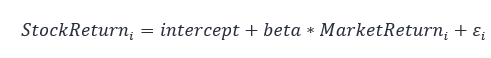

In [ ]:
sns.lmplot(x = "Mkt", y = "MSFT", data = df)
plt.show()

In [ ]:
model = ols("MSFT ~ Mkt", data = df)

In [ ]:
results = model.fit()

In [ ]:
print(results.summary())

__CAPM:__

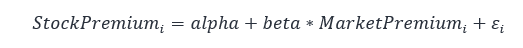

In [ ]:
sns.lmplot(x = "MktPrem", y = "MSFTPrem", data = df)
plt.show()

In [ ]:
model2 = ols("MSFTPrem ~ MktPrem", data = df)

In [ ]:
results2 = model2.fit()

In [ ]:
print(results2.summary())

In [ ]:
(results2.params.Intercept / 100 + 1)**252 - 1

### Creating a Fama-French three-factor model

In [ ]:
import pandas as pd
import yfinance as yf
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("F-F_Research_Data_Factors_daily.CSV", skiprows = 4, skipfooter = 1, parse_dates = [0],
                 index_col = 0, engine = "python")

In [ ]:
df

In [ ]:
df.info()

In [ ]:
msft = yf.download("MSFT", start = "2016-12-31", end = "2019-12-31", multi_level_index= False) # new from yfinance 0.2.48
msft

In [ ]:
msft.index = pd.to_datetime(msft.index.date) # new
msft

In [ ]:
msft = msft.loc[:, "Adj Close"]

In [ ]:
msft = msft.pct_change().dropna()
msft

In [ ]:
msft = msft * 100

In [ ]:
df["MSFT"] = msft

In [ ]:
df = df.dropna()
df

In [ ]:
df = df.rename(columns = {"Mkt-RF":"MktPrem"})
df

In [ ]:
df["MSFTPrem"] = df.MSFT - df.RF
df

In [ ]:
df.info()

In [ ]:
df.corr()

In [ ]:
sns.pairplot(df, kind = "reg")
plt.show()

In [ ]:
model = ols("MSFTPrem ~ MktPrem + SMB + HML", data=df)

In [ ]:
results = model.fit()

In [ ]:
print(results.summary())

In [ ]:
(results.params.Intercept / 100 + 1)**252 - 1

### Creating a Fama-French five-factor model

In [ ]:
import pandas as pd
import yfinance as yf
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("F-F_Research_Data_5_Factors_2x3_daily.CSV", skiprows = 3, 
                 parse_dates = [0], index_col = 0)

In [ ]:
df

In [ ]:
df = df.rename(columns = {"Mkt-RF":"MktPrem"})
df

In [ ]:
msft = yf.download("MSFT", start = "2016-12-31", end = "2019-12-31", multi_level_index= False) # new from yfinance 0.2.48
msft

In [ ]:
msft.index = pd.to_datetime(msft.index.date) # new
msft

In [ ]:
msft = msft.loc[:, "Adj Close"]

In [ ]:
msft = msft.pct_change().dropna()
msft

In [ ]:
msft = msft * 100

In [ ]:
df["MSFT"] = msft

In [ ]:
df = df.dropna().copy()

In [ ]:
df["MSFTPrem"] = df.MSFT - df.RF
df

In [ ]:
df.info()

In [ ]:
df.corr()

In [ ]:
sns.pairplot(df, kind = "reg")
plt.show()

In [ ]:
model = ols("MSFTPrem ~ MktPrem + SMB + HML + CMA", data = df)

In [ ]:
results = model.fit()

In [ ]:
print(results.summary())

In [ ]:
(results.params.Intercept / 100 + 1)**252 - 1